# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
colors = list(TABLEAU_COLORS.keys())
colors = [colors[3], colors[2], colors[0]]

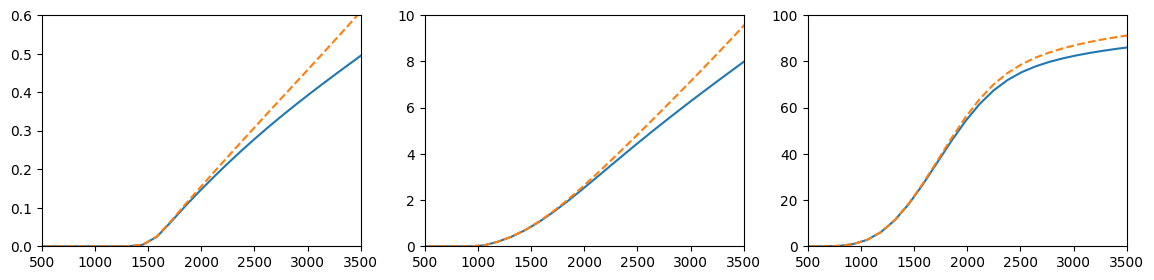

In [32]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dt = 1.5
eta_tr = 1e-2
phi = 1

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharex=True)

def integrate_flux(t, F):
    return np.trapz(F, x=t)

for i in range(3):
    N_des_soret = np.zeros(25)
    N_des_no_soret = np.zeros(25)
    T_max_soret = np.zeros(25)
    T_max_no_soret = np.zeros(25)

    for j in range(1, 26):
        E = E_maxs[i] * j / 25

        name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

        fluxes_soret = np.loadtxt("./results_soret/fluxes_" + name_pattern + "_wSoret.csv", delimiter=",")
        fluxes_no_soret = np.loadtxt("./results_soret/fluxes_" + name_pattern + "_woSoret.csv", delimiter=",")

        data_soret = np.loadtxt("./results_soret/data_" + name_pattern + "_wSoret.csv", delimiter=",", skiprows=1)
        data_no_soret = np.loadtxt("./results_soret/data_" + name_pattern + "_woSoret.csv", delimiter=",", skiprows=1)

        T_max_soret[j-1] = data_soret[:,3].max()
        T_max_no_soret[j-1] = data_no_soret[:,3].max()        
        
        N_des_soret[j-1] = integrate_flux(fluxes_soret[:,0], fluxes_soret[:, 1]+fluxes_soret[:, 2])
        N_des_no_soret[j-1] = integrate_flux(fluxes_no_soret[:,0], fluxes_no_soret[:, 1]+fluxes_no_soret[:, 2])

    axs[i].plot(T_max_no_soret, N_des_no_soret/(10e-6*1e-2*6.31e28)*100)
    axs[i].plot(T_max_soret, N_des_soret/(10e-6*1e-2*6.31e28)*100, ls="dashed")

axs[0].set_xlim(500, 3500)
axs[0].set_ylim(0, 0.6)
axs[1].set_ylim(0,10)
axs[2].set_ylim(0,100)
plt.show()

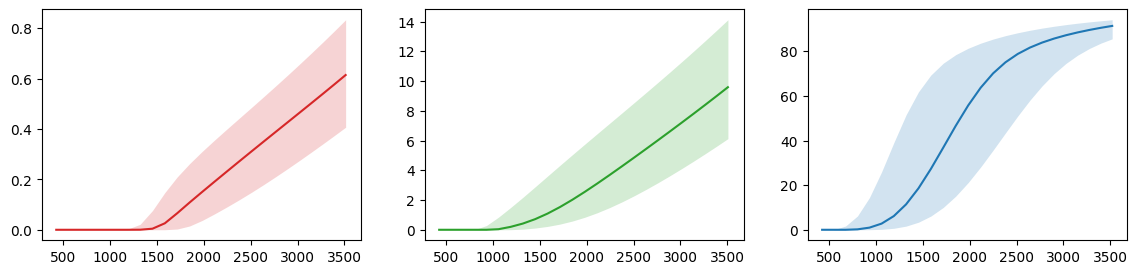

In [7]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dts = [1.0, 1.25, 1.5, 1.75, 2.0]
E_dt = 1.5

eta_trs = [1e-4, 1e-3, 1e-2, 1e-1]
eta_tr = 1e-2

phis = [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
phi = 1

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharex=True)

def integrate_flux(t, F):
    return np.trapz(F, x=t)

for i in range(3):
    all_T = []
    all_N_des = []
    for E_dt in E_dts:
        N_des = np.zeros(25)
        T_max = np.zeros(25)
        for j in range(1, 26):
            E = E_maxs[i] * j / 25

            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

            fluxes = np.loadtxt("./results_Edt_T/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("./results_Edt_T/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)

            T_max[j-1] = data[:,3].max()     
            
            N_des[j-1] = integrate_flux(fluxes[:,0], fluxes[:, 1]+fluxes[:, 2])/(10e-6*1e-2*6.31e28)*100

        all_T.append(T_max)
        all_N_des.append(N_des)

    axs[i].plot(all_T[2], all_N_des[2], color=colors[i])      
    axs[i].fill_between(all_T[0], all_N_des[0], all_N_des[-1], linewidth=0, alpha=0.2, color=colors[i])


plt.show()

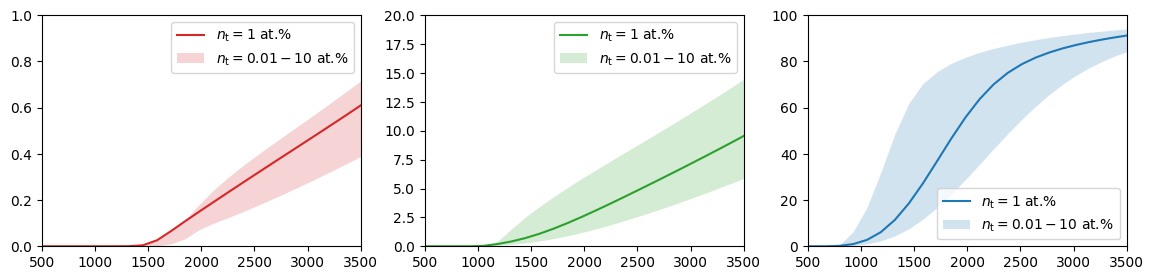

In [29]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dts = [1.0, 1.25, 1.5, 1.75, 2.0]
E_dt = 1.5

eta_trs = [1e-4, 1e-3, 1e-2, 1e-1]
eta_tr = 1e-2

phis = [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
phi = 1

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharex=True)

def integrate_flux(t, F):
    return np.trapz(F, x=t)

def get_maxs(data):
    data = np.array(data)
    maxs = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        maxs[i] = data[:,i].max()
    return maxs

def get_mins(data):
    data = np.array(data)
    mins = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        mins[i] = data[:,i].min()
    return mins

for i in range(3):
    all_T = []
    all_N_des = []
    for eta_tr in eta_trs:
        N_des = np.zeros(25)
        T_max = np.zeros(25)
        for j in range(1, 26):
            E = E_maxs[i] * j / 25

            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

            fluxes = np.loadtxt("./results_eta_T/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("./results_eta_T/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)

            T_max[j-1] = data[:,3].max()     
            
            N_des[j-1] = integrate_flux(fluxes[:,0], fluxes[:, 1]+fluxes[:, 2])/(10e-6*eta_tr*6.31e28)*100

        all_T.append(T_max)
        all_N_des.append(N_des)

    
    axs[i].plot(all_T[2], all_N_des[2], color=colors[i], label = r"$n_\mathrm{t}=1$ at.%")  

    maxs = get_maxs(all_N_des)    
    mins = get_mins(all_N_des)    
    axs[i].fill_between(all_T[0], mins, maxs, linewidth=0, alpha=0.2, color=colors[i], label = r"$n_\mathrm{t}=0.01 - 10$ at.%")

    axs[i].legend()
axs[0].set_ylim(0,1)
axs[1].set_ylim(0,20)
axs[2].set_ylim(0,100)
axs[0].set_xlim(500,3500)
plt.show()

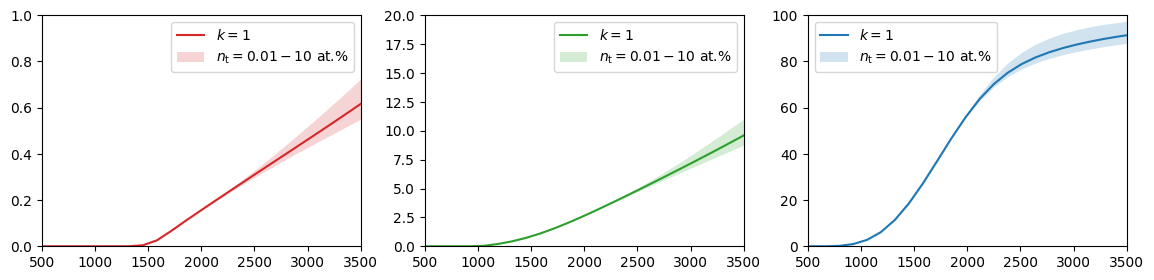

In [ ]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dts = [1.0, 1.25, 1.5, 1.75, 2.0]
E_dt = 1.5

eta_trs = [1e-4, 1e-3, 1e-2, 1e-1]
eta_tr = 1e-2

phis = [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
phi = 1

alphas = [0.1, 0.5, 1.00, 5, 10]
alpha = 1

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharex=True)

def integrate_flux(t, F):
    return np.trapz(F, x=t)

for i in range(3):
    all_T = []
    all_N_des = []
    for alpha in alphas:
        N_des = np.zeros(25)
        T_max = np.zeros(25)
        for j in range(1, 26):
            E = E_maxs[i] * j / 25 * np.sqrt(alpha)

            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}_alpha{alpha:.2f}"

            fluxes = np.loadtxt("./results_kappa_T/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("./results_kappa_T/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)

            T_max[j-1] = data[:,3].max()     
            
            N_des[j-1] = integrate_flux(fluxes[:,0], fluxes[:, -1])/(10e-6*eta_tr*6.31e28)*100

        all_T.append(T_max)
        all_N_des.append(N_des)

    
    axs[i].plot(all_T[2], all_N_des[2], color=colors[i], label = r"$k=1$")  

    maxs = get_maxs(all_N_des)    
    mins = get_mins(all_N_des)    
    axs[i].fill_between(all_T[0], mins, maxs, linewidth=0, alpha=0.2, color=colors[i], label = r"$n_\mathrm{t}=0.01 - 10$ at.%")

    axs[i].legend()
axs[0].set_ylim(0,1)
axs[1].set_ylim(0,20)
axs[2].set_ylim(0,100)
axs[0].set_xlim(500,3500)
plt.show()

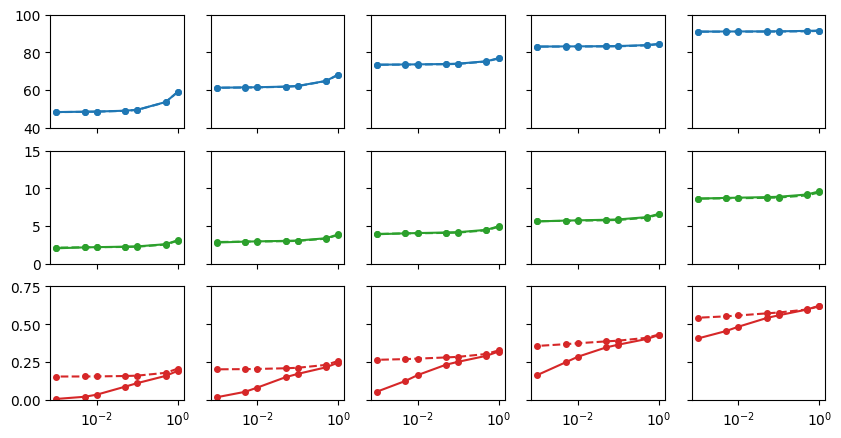

In [17]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [7e3, 110e3, 2.5e6]
E_dts = [1.0, 1.25, 1.5, 1.75, 2.0]
E_dt = 1.5

eta_trs = [1e-4, 1e-3, 1e-2, 1e-1]
eta_tr = 1e-2

phis = [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
phi = 1

alphas = [0.5, 0.75, 1.00, 1.25, 1.50]
alpha = 1

fig, axs = plt.subplots(3, len(alphas), figsize=(10,5), sharex=True, sharey='row')

def integrate_flux(t, F):
    return np.trapz(F, x=t)

def get_maxs(data):
    data = np.array(data)
    maxs = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        maxs[i] = data[:,i].max()
    return maxs

def get_mins(data):
    data = np.array(data)
    mins = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        mins[i] = data[:,i].min()
    return mins

for i in range(3):
    all_T = []
    all_N_des = []
    for j, alpha in enumerate(alphas):
        E = E_maxs[i]
        N_des = np.zeros(len(phis))
        N_dif = np.zeros(len(phis))
        for k, phi in enumerate(phis):
            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}_alpha{alpha:.2f}"

            fluxes = np.loadtxt("/mnt/X/PhD_data/LID/Properties_effect/results_kappa_phi/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("/mnt/X/PhD_data/LID/Properties_effect/results_kappa_phi/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)    

            N_des[k] = integrate_flux(fluxes[:,0], fluxes[:, -1])/(10e-6*eta_tr*phi*6.31e28)*100
            N_dif[k] = np.trapz(-data[:,2], x=data[:, 0])/(10e-6*eta_tr*phi*6.31e28)*100

        axs[2-i, 4-j].plot(phis, N_des, color=colors[i], marker="o", ms=4)  
        axs[2-i, 4-j].plot(phis, N_dif, color=colors[i], ls="dashed", marker="o", ms=4) 

        axs[2-i, 4-j].set_xscale('log')

axs[2, 0].set_ylim(0,0.75)
axs[2, 0].set_yticks([0,0.25,0.5,0.75])
axs[1, 0].set_ylim(0,15)
axs[0, 0].set_ylim(40,100)
plt.show()

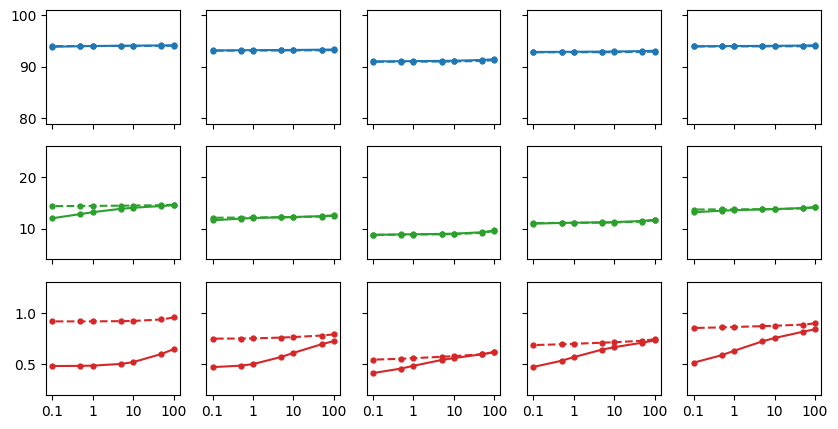

In [7]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dts = [1.0, 1.25, 1.5, 1.75, 2.0]
E_dt = 1.5

eta_trs = [1e-4, 1e-3, 1e-2, 1e-1]
eta_tr = 1e-2

phis = [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
phi = 1

alphas = [0.5, 0.75, 1.00, 1.25, 1.50]
alpha = 1

fig, axs = plt.subplots(3, len(alphas), figsize=(10,5), sharex=True, sharey='row')

def integrate_flux(t, F):
    return np.trapz(F, x=t)

def get_maxs(data):
    data = np.array(data)
    maxs = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        maxs[i] = data[:,i].max()
    return maxs

def get_mins(data):
    data = np.array(data)
    mins = np.zeros(len(data[0]))
    for i, l1 in enumerate(data[0]):
        mins[i] = data[:,i].min()
    return mins

kwargs = {
    "marker": "o",
    "ms": 3.5,
    "lw": 1.5
}

for i in range(3):
    all_T = []
    all_N_des = []

    E_dt = 1.5
    for j, eta_tr in enumerate(eta_trs[0:3]):
        E = E_maxs[i]
        N_des = np.zeros(len(phis))
        N_dif = np.zeros(len(phis))
        for k, phi in enumerate(phis):
            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

            fluxes = np.loadtxt("./results_eta_phi/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("./results_eta_phi/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)    

            N_des[k] = integrate_flux(fluxes[:,0], fluxes[:, -1])/(10e-6*eta_tr*phi*6.31e28)*100
            N_dif[k] = integrate_flux(data[:,0], -data[:, 2])/(10e-6*eta_tr*phi*6.31e28)*100

        axs[2-i, j].plot(np.array(phis)*100, N_des, color=colors[i], **kwargs)  
        axs[2-i, j].plot(np.array(phis)*100, N_dif, color=colors[i], ls="dashed", **kwargs) 

    eta_tr = 1e-2
    for j, E_dt in enumerate(E_dts[-4:-6:-1]):
        E = E_maxs[i]
        N_des = np.zeros(len(phis))
        N_dif = np.zeros(len(phis))
        for k, phi in enumerate(phis):
            name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

            fluxes = np.loadtxt("./results_Edt_phi/fluxes_" + name_pattern + ".csv", delimiter=",")
            data = np.loadtxt("./results_Edt_phi/data_" + name_pattern + ".csv", delimiter=",", skiprows=1)    

            N_des[k] = integrate_flux(fluxes[:,0], fluxes[:, -1])/(10e-6*eta_tr*phi*6.31e28)*100
            N_dif[k] = integrate_flux(data[:,0], -data[:, 2])/(10e-6*eta_tr*phi*6.31e28)*100

        axs[2-i, j+3].plot(np.array(phis)*100, N_des, color=colors[i], **kwargs)  
        axs[2-i, j+3].plot(np.array(phis)*100, N_dif, color=colors[i], ls="dashed", **kwargs) 


axs[0,0].set_xscale('log')
axs[0,0].set_xticks([0.1,1,10,100])
axs[0,0].set_xticklabels(["0.1","1","10","100"])
axs[2, 0].set_ylim(0.2,1.30)
axs[1, 0].set_ylim(5-20*0.05,25+20*0.05)
axs[0, 0].set_ylim(80-20*0.05,100+20*0.05)
plt.show()